<center>
  <h2>Trabajo Laboratorio de Implementación III - MCD Virtual Cohorte 2022</h2>
  <h3>Forecasting para una Empresa de Consumo Masivo</h3>
  <h4>Experimento 9 AutoGluon</h4>
</center>

In [1]:
# !pip install autogluon
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [2]:
df = pd.read_csv("C:/Users/usuario/otros/Desktop/MCD/6 Labo III/Forecasting Problem/Datasets/df_ventas_product.csv", header = None)
df.columns = ["timestamp", "item_id", "target"]
df.head(5)

,timestamp,item_id,target
0,2017-01-01,20001,934.77222
1,2017-01-01,20002,550.15707
2,2017-01-01,20003,1063.45835
3,2017-01-01,20004,555.91614
4,2017-01-01,20005,494.27011


In [3]:
data = TimeSeriesDataFrame(df)
data

,,target
item_id,timestamp,
20001,2017-01-01,934.77222
20002,2017-01-01,550.15707
20003,2017-01-01,1063.45835
20004,2017-01-01,555.91614
20005,2017-01-01,494.27011
...,...,...
21263,2019-12-01,0.01270
21265,2019-12-01,0.05007
21266,2019-12-01,0.05121


In [7]:
predictor = TimeSeriesPredictor(target='target', prediction_length=2, freq="M").fit(data, 
                                                                                    presets="chronos_tiny")

Frequency 'M' stored as 'ME'
Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels\ag-20240621_154500'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.2
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
GPU Count:          0
Memory Avail:       1.00 GB / 7.88 GB (12.7%)
Disk Space Avail:   8.01 GB / 110.21 GB (7.3%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Setting presets to: chronos_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'ME',
 'hyperparameters': {'Chronos': {'model_path': 'tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 2,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verb

In [9]:
predictions = predictor.predict(data)

data with frequency 'None' has been resampled to frequency 'ME'.
Model not specified in predict, will default to the model with the best validation score: Chronos[tiny]


data with frequency 'None' has been resampled to frequency 'ME'.


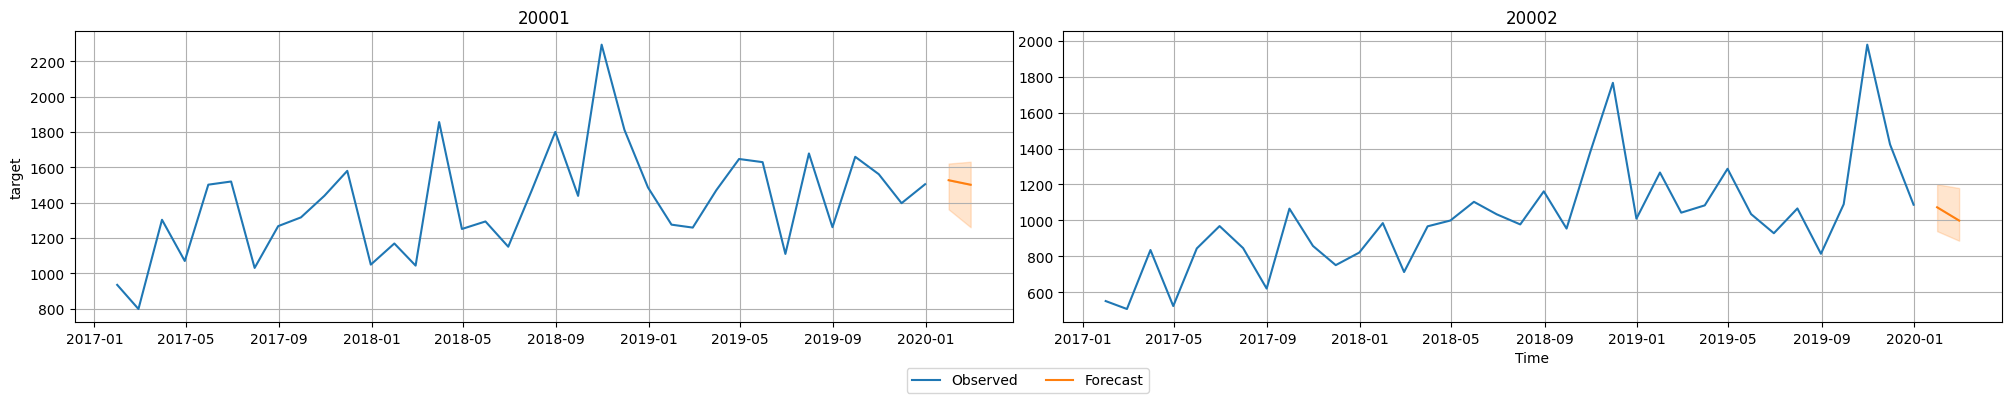

In [10]:
predictor.plot(
    data=data, 
    predictions=predictions, 
    item_ids=[20001, 20002],
    max_history_length=200,
)

In [11]:
predictions_v1 = predictions.copy()
predictions_v1 = predictions_v1.reset_index()
predictions_v1 = predictions_v1[["item_id", "timestamp", "mean"]]
predictions_v1 = predictions_v1[predictions_v1.timestamp == "2020-02-29"]
predictions_v1 = predictions_v1.drop(columns = {"timestamp"})
predictions_v1 = predictions_v1.rename(columns = {"item_id":"product_id", "mean":"tn"})
predictions_v1.head(5)

,product_id,tn
1,20001,1453.191412
3,20002,1017.508389
5,20003,804.600885
7,20004,483.769896
9,20005,482.678093


In [12]:
predictions_v1.to_csv("C:/Users/usuario/otros/Desktop\MCD/6 Labo III/Forecasting Problem/Outputs/prediccion_autogluon_chronos_v1.csv", sep = ",", index = False)

In [15]:
!pip install -q "autogluon.timeseries[chronos-openvino]"

In [16]:
%%capture
predictor = TimeSeriesPredictor(target='target', prediction_length=2, freq="M").fit(data, 
                                                                                    hyperparameters={"Chronos": {"model_path": "tiny",
                                                                                                                 "batch_size": 64,
                                                                                                                 "device": "cpu",
                                                                                                                 "optimization_strategy": "openvino"}
                                                                                                     },
                                                                                    skip_model_selection=True,
                                                                                    verbosity=0)
predictor.persist()

Frequency 'M' stored as 'ME'


In [17]:
%%time
predictions = predictor.predict(data)

CPU times: total: 1min 14s
Wall time: 40.2 s


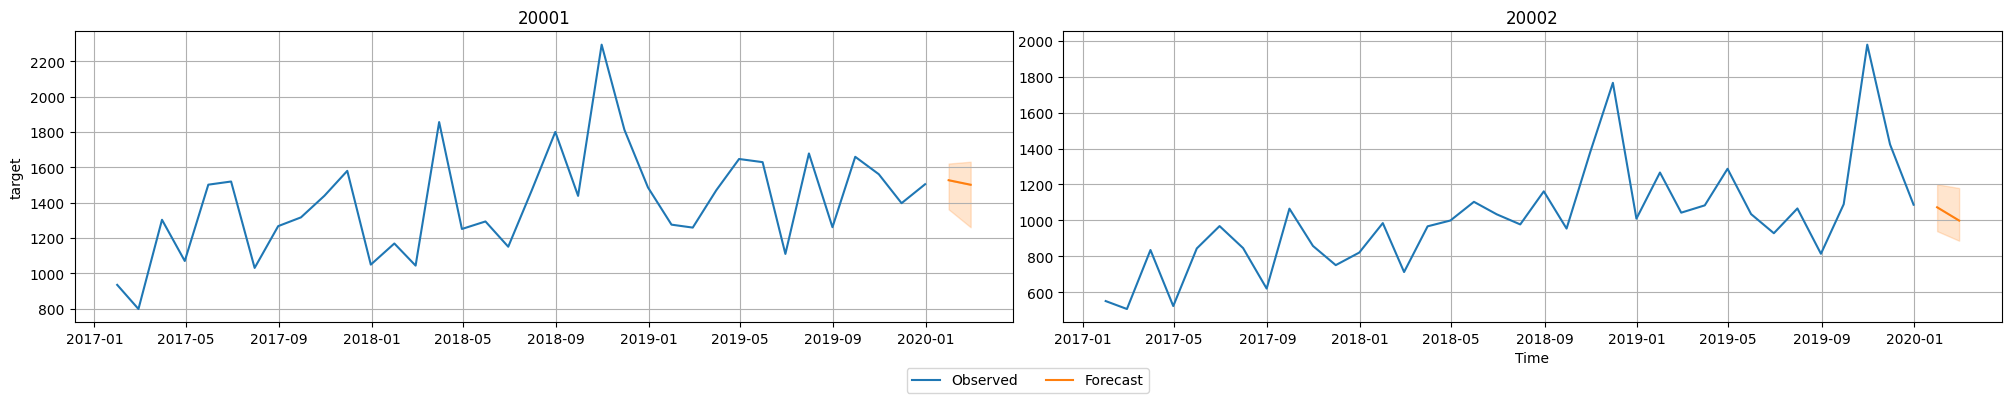

In [18]:
predictor.plot(
    data=data, 
    predictions=predictions, 
    item_ids=[20001, 20002],
    max_history_length=200,
)

In [19]:
predictions_v1 = predictions.copy()
predictions_v1 = predictions_v1.reset_index()
predictions_v1 = predictions_v1[["item_id", "timestamp", "mean"]]
predictions_v1 = predictions_v1[predictions_v1.timestamp == "2020-02-29"]
predictions_v1 = predictions_v1.drop(columns = {"timestamp"})
predictions_v1 = predictions_v1.rename(columns = {"item_id":"product_id", "mean":"tn"})
predictions_v1.head(5)

,product_id,tn
1,20001,1453.191382
3,20002,1017.508288
5,20003,804.600917
7,20004,483.769911
9,20005,482.678098


In [20]:
predictions_v1.to_csv("C:/Users/usuario/otros/Desktop\MCD/6 Labo III/Forecasting Problem/Outputs/prediccion_autogluon_chronos_v2.csv", sep = ",", index = False)